In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model,ensemble,svm
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
dataset=pd.read_csv('campaign.csv')
data=dataset.copy(deep=True)

# EDA

In [4]:
data.head()

,impressions,budget,start_month,end_month,start_week,end_week,days,region,category,facebook,instagram,google_search,google_display
0,2800465,20400,9,11,39,47,57,germany,other,0,1,0,0
1,5168715,18300,12,5,49,19,154,austria,conference,1,1,1,1
2,2988965,10900,5,6,19,24,33,switzerland,festival,1,1,1,1
3,2230524,10700,3,6,9,25,110,germany,conference,1,1,1,1
4,2346054,10600,5,8,20,35,473,germany,comedy,1,1,1,0


In [5]:
data.shape

(241, 13)

In [6]:
data.describe()

,impressions,budget,start_month,end_month,start_week,end_week,days,facebook,instagram,google_search,google_display
count,2.410000e+02,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,3.488293e+05,1353.112033,7.120332,7.327801,29.087137,30.145228,56.302905,0.975104,0.692946,0.651452,0.049793
std,9.075496e+05,2358.601427,3.590213,3.662367,15.427677,16.118560,59.147587,0.156133,0.462232,0.477502,0.217969
min,9.586000e+03,100.000000,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,6.667600e+04,400.000000,4.000000,4.000000,16.000000,16.000000,21.000000,1.000000,0.000000,0.000000,0.000000
50%,1.251160e+05,600.000000,8.000000,7.000000,33.000000,31.000000,37.000000,1.000000,1.000000,1.000000,0.000000
75%,3.012230e+05,1300.000000,10.000000,11.000000,44.000000,46.000000,65.000000,1.000000,1.000000,1.000000,0.000000
max,1.153939e+07,20400.000000,12.000000,12.000000,51.000000,53.000000,473.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   impressions     241 non-null    int64 
 1   budget          241 non-null    int64 
 2   start_month     241 non-null    int64 
 3   end_month       241 non-null    int64 
 4   start_week      241 non-null    int64 
 5   end_week        241 non-null    int64 
 6   days            241 non-null    int64 
 7   region          241 non-null    object
 8   category        239 non-null    object
 9   facebook        241 non-null    int64 
 10  instagram       241 non-null    int64 
 11  google_search   241 non-null    int64 
 12  google_display  241 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 24.6+ KB


In [8]:
data.isnull().sum()

impressions       0
budget            0
start_month       0
end_month         0
start_week        0
end_week          0
days              0
region            0
category          2
facebook          0
instagram         0
google_search     0
google_display    0
dtype: int64

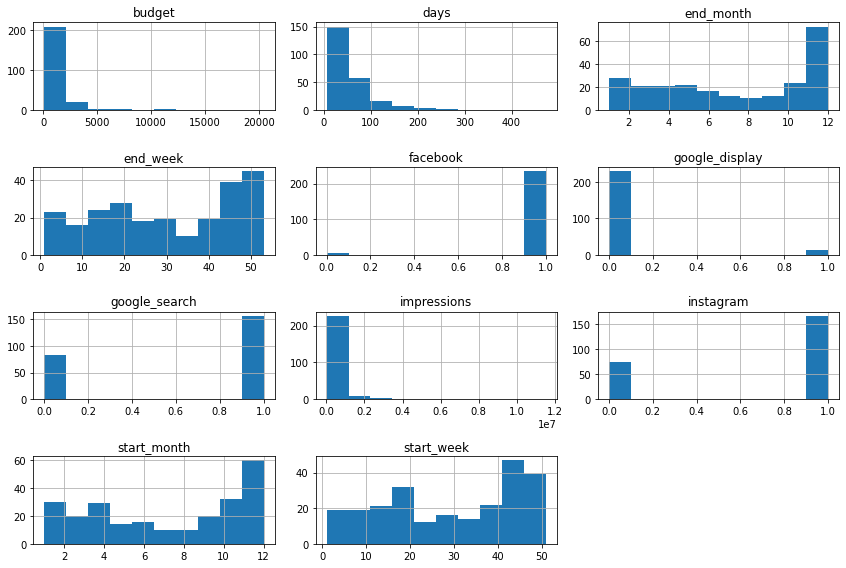

In [8]:
data.hist(bins=10,figsize=(12,8))
plt.tight_layout();

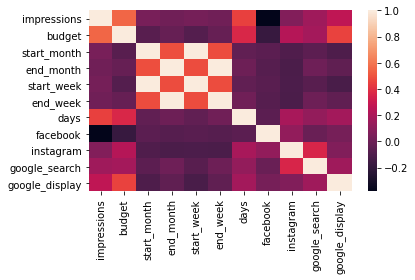

In [9]:
sns.heatmap(data._get_numeric_data().astype(float).corr()).figure.tight_layout()

In [9]:
data.corr().iloc[0].sort_values(ascending=False)

impressions       1.000000
budget            0.556317
days              0.449491
google_display    0.269616
google_search     0.164593
instagram         0.073916
start_month       0.039573
start_week        0.029295
end_month         0.014446
end_week          0.012436
facebook         -0.382057
Name: impressions, dtype: float64

Here we can see the ther is good +ve correlation for *budget amount* and *days* w.r.t *impressions*. -ve Correlation between *impressions* and *facebook*.

# Preprocessing 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
data.columns

Index(['impressions', 'budget', 'start_month', 'end_month', 'start_week',
       'end_week', 'days', 'region', 'category', 'facebook', 'instagram',
       'google_search', 'google_display'],
      dtype='object')

In [12]:
cols=['region', 'category']
for c in cols:
    df=pd.get_dummies(data[c],prefix=c,prefix_sep=':')
    data=pd.concat([data,df],axis=1)

In [13]:
data.columns.values

array(['impressions', 'budget', 'start_month', 'end_month', 'start_week',
       'end_week', 'days', 'region', 'category', 'facebook', 'instagram',
       'google_search', 'google_display', 'region:austria',
       'region:europe', 'region:germany', 'region:switzerland',
       'region:uk', 'region:usa', 'region:world', 'category:comedy',
       'category:concert', 'category:conference', 'category:festival',
       'category:other', 'category:sport', 'category:sports',
       'category:theatre'], dtype=object)

In [14]:
data=data.dropna()

# Splitting

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(['impressions'],axis=1),data['impressions'],test_size=0.2,random_state=42)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((191, 27), (48, 27), (191,), (48,))

In [17]:
x_train=x_train.drop(['region','category'],axis=1)
x_test=x_test.drop(['region','category'],axis=1)

# model

In [19]:
import statsmodels.api as sm

In [20]:
x=sm.add_constant(x_train)

In [21]:
model=sm.OLS(y_train,x).fit()

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            impressions   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     9.543
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           7.38e-20
Time:                        03:08:49   Log-Likelihood:                -2832.1
No. Observations:                 191   AIC:                             5710.
Df Residuals:                     168   BIC:                             5785.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.46e+06   3

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [18]:
sc=StandardScaler()
x=sc.fit_transform(x_train)
x_t=sc.fit_transform(x_test)
y=sc.fit_transform(y_train.values.reshape(-1,1))
y_t=sc.fit_transform(y_test.values.reshape(-1,1))

In [45]:
mod_list=['linear','rf','svr']
models={
    'linear':sk.linear_model.LinearRegression(),
    'rf':sk.ensemble.RandomForestRegressor(n_estimators=20,min_samples_leaf=8,criterion='mse',ccp_alpha=0.3),
    'svr':sk.svm.SVR(kernel='linear',C=1.7,degree=2,epsilon=0.05,gamma='scale')   
}

In [46]:
for mod in mod_list:
    clf=models[mod]
    if mod=='svr':
        clf.fit(x,y)
        y_pred=clf.predict(x_t)
        y_pred=sc.inverse_transform(y_pred)
        testMSE=np.sqrt(np.square(np.subtract(y_pred,y_test)).mean())
        print(f'{mod} Mean_squared error= {testMSE}')
    else:
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        testMSE=np.sqrt(np.square(np.subtract(y_pred,y_test)).mean())
        print(f'{mod} Mean_squared error= {testMSE}')

linear Mean_squared error= 553187.9930217323
rf Mean_squared error= 281879.0261705619
svr Mean_squared error= 196639.3769069102


c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Before tuning
linear Mean_squared error= 553187.9930217323||
rf Mean_squared error= 594226.9567807164||
svr Mean_squared error= 283193.1695113454
## After tuning
linear Mean_squared error= 553187.9930217323||
rf Mean_squared error= 281879.0261705619||
svr Mean_squared error= 196639.3769069102

# Hyperparameter Tuning

In [32]:
param_rf={
    'n_estimators':list(range(10,200,10)),
    'criterion':['mse'],
    'min_samples_leaf':list(range(2, 10, 1)),
    'ccp_alpha':list(np.arange(0,0.5,0.1))
}
param_svr={
    'kernel':['linear', 'poly', 'rbf'],
    'C':[x*0.1 for x in range(1,20)],
    'gamma':['scale','auto'],
    'epsilon':[x*0.01 for x in range(1,20,2)],
    'degree': list(range(2, 5, 1))
}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
clf_gs_rf=sk.ensemble.RandomForestRegressor()
clf_gs_svr=sk.svm.SVR()
gs_rf=GridSearchCV(clf_gs_rf, param_grid = param_rf,cv=2, verbose=True, n_jobs=-1)
gs_svr=GridSearchCV(clf_gs_svr, param_grid = param_svr,cv=2, verbose=True, n_jobs=-1)

In [35]:
gs_rf.fit(x_train,y_train)
print(gs_rf.best_score_,gs_rf.best_params_)

Fitting 2 folds for each of 760 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.8min


0.42863761967030817 {'ccp_alpha': 0.30000000000000004, 'criterion': 'mse', 'min_samples_leaf': 2, 'n_estimators': 20}


[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  4.7min finished


In [36]:
gs_svr.fit(x,y)
print(gs_svr.best_score_,gs_svr.best_params_)

Fitting 2 folds for each of 3420 candidates, totalling 6840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4360 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6560 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 6840 out of 6840 | elapsed:  3.4min finished
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.4836112455502033 {'C': 1.7000000000000002, 'degree': 2, 'epsilon': 0.05, 'gamma': 'scale', 'kernel': 'linear'}


### The highest prediction accuracy has been achieved with a *Support Vector Regressor*.

In [19]:
import tensorflow as tf

In [60]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer='adam',loss='mean_squared_error')

In [61]:
ann.fit(x,y,batch_size=32,epochs=350)

Train on 191 samples
Epoch 1/350
191/191 [==============================] - 0s 1ms/sample - loss: 1.3343
Epoch 2/350
191/191 [==============================] - 0s 63us/sample - loss: 1.2906
Epoch 3/350
191/191 [==============================] - 0s 73us/sample - loss: 1.2381
Epoch 4/350
191/191 [==============================] - 0s 78us/sample - loss: 1.2055
Epoch 5/350
191/191 [==============================] - 0s 84us/sample - loss: 1.1650
Epoch 6/350
191/191 [==============================] - 0s 84us/sample - loss: 1.1365
Epoch 7/350
191/191 [==============================] - 0s 63us/sample - loss: 1.1022
Epoch 8/350
191/191 [==============================] - 0s 78us/sample - loss: 1.0789
Epoch 9/350
191/191 [==============================] - 0s 63us/sample - loss: 1.0541
Epoch 10/350
191/191 [==============================] - 0s 84us/sample - loss: 1.0324
Epoch 11/350
191/191 [==============================] - 0s 84us/sample - loss: 1.0166
Epoch 12/350
191/191 [=====================

191/191 [==============================] - 0s 78us/sample - loss: 0.1682
Epoch 96/350
191/191 [==============================] - 0s 78us/sample - loss: 0.1612
Epoch 97/350
191/191 [==============================] - 0s 68us/sample - loss: 0.1581
Epoch 98/350
191/191 [==============================] - 0s 94us/sample - loss: 0.1529
Epoch 99/350
191/191 [==============================] - 0s 78us/sample - loss: 0.1495
Epoch 100/350
191/191 [==============================] - 0s 63us/sample - loss: 0.1437
Epoch 101/350
191/191 [==============================] - 0s 57us/sample - loss: 0.1401
Epoch 102/350
191/191 [==============================] - 0s 73us/sample - loss: 0.1360
Epoch 103/350
191/191 [==============================] - 0s 73us/sample - loss: 0.1316
Epoch 104/350
191/191 [==============================] - 0s 73us/sample - loss: 0.1289
Epoch 105/350
191/191 [==============================] - 0s 68us/sample - loss: 0.1257
Epoch 106/350
191/191 [==============================] - 0s 7

191/191 [==============================] - 0s 84us/sample - loss: 0.0409
Epoch 190/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0408
Epoch 191/350
191/191 [==============================] - 0s 84us/sample - loss: 0.0406
Epoch 192/350
191/191 [==============================] - 0s 84us/sample - loss: 0.0403
Epoch 193/350
191/191 [==============================] - 0s 84us/sample - loss: 0.0401
Epoch 194/350
191/191 [==============================] - 0s 73us/sample - loss: 0.0398
Epoch 195/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0397
Epoch 196/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0393
Epoch 197/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0391
Epoch 198/350
191/191 [==============================] - 0s 73us/sample - loss: 0.0389
Epoch 199/350
191/191 [==============================] - 0s 99us/sample - loss: 0.0386
Epoch 200/350
191/191 [==============================] - 

191/191 [==============================] - 0s 78us/sample - loss: 0.0258
Epoch 284/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0258
Epoch 285/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0256
Epoch 286/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0255
Epoch 287/350
191/191 [==============================] - 0s 84us/sample - loss: 0.0253
Epoch 288/350
191/191 [==============================] - 0s 84us/sample - loss: 0.0253
Epoch 289/350
191/191 [==============================] - 0s 94us/sample - loss: 0.0251
Epoch 290/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0250
Epoch 291/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0249
Epoch 292/350
191/191 [==============================] - 0s 73us/sample - loss: 0.0248
Epoch 293/350
191/191 [==============================] - 0s 78us/sample - loss: 0.0247
Epoch 294/350
191/191 [==============================] - 

In [62]:
y_pred=ann.predict(x_test)
np.set_printoptions(precision=2)

In [63]:
testMSE=np.sqrt(np.square(np.subtract(y_pred,y_test.values)).mean())
print(f'Mean_squared error= {testMSE}')

Mean_squared error= 479223.1665713537


In [64]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[2.39e+02 3.75e+05]
 [7.13e+02 1.71e+06]
 [6.87e+01 1.01e+05]
 [7.81e+01 1.30e+05]
 [6.63e+01 9.54e+04]
 [6.02e+01 9.33e+04]
 [3.17e+01 6.50e+04]
 [8.87e+01 1.40e+05]
 [4.89e+02 1.00e+06]
 [7.36e+01 1.00e+05]
 [1.55e+02 3.47e+05]
 [3.08e+01 1.18e+05]
 [6.77e+01 1.70e+05]
 [6.07e+01 7.32e+04]
 [6.46e+01 1.56e+05]
 [4.35e+01 1.83e+04]
 [4.76e+01 3.80e+04]
 [3.06e+02 7.02e+05]
 [4.91e+01 5.02e+04]
 [7.24e+01 1.06e+05]
 [6.61e+01 1.12e+05]
 [2.87e+02 1.32e+06]
 [5.25e+01 2.61e+04]
 [2.30e+02 7.39e+05]
 [5.56e+01 1.01e+05]
 [4.19e+01 5.00e+04]
 [4.76e+02 1.13e+06]
 [3.40e+01 4.56e+04]
 [6.03e+01 3.31e+04]
 [7.94e+01 1.28e+05]
 [8.29e+01 1.36e+05]
 [5.39e+01 2.59e+04]
 [2.19e+02 5.00e+05]
 [6.25e+01 2.47e+05]
 [2.77e+02 8.29e+05]
 [1.11e+02 5.63e+05]
 [5.39e+01 2.52e+04]
 [1.34e+02 4.06e+05]
 [9.39e+01 1.34e+05]
 [4.06e+01 5.19e+04]
 [2.22e+01 6.17e+04]
 [7.32e+01 1.51e+05]
 [6.58e+01 1.16e+05]
 [3.55e+02 7.13e+05]
 [5.71e+01 1.65e+05]
 [9.97e+01 2.01e+05]
 [3.84e+01 6.85e+04]
 [2.29e+02 6.